   Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
0             1   56   21920           639       452748         72   
1             2   69  126121           655       257134         60   
2             3   46   96872           467       226437         72   
3             4   32  101132           751       310480         12   
4             5   60   22093           404        13070         12   

   Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
0           4.53        Unemployed                 43.35        Married   
1           5.38        Unemployed                 10.42       Divorced   
2           3.46     Self-Employed                 45.39       Divorced   
3          14.00        Unemployed                  8.58         Single   
4           9.13     Self-Employed                 20.70       Divorced   

   Number_of_Dependents Property_Ownership Loan_Purpose  Previous_Defaults  
0                     2           Mortgage     Busi

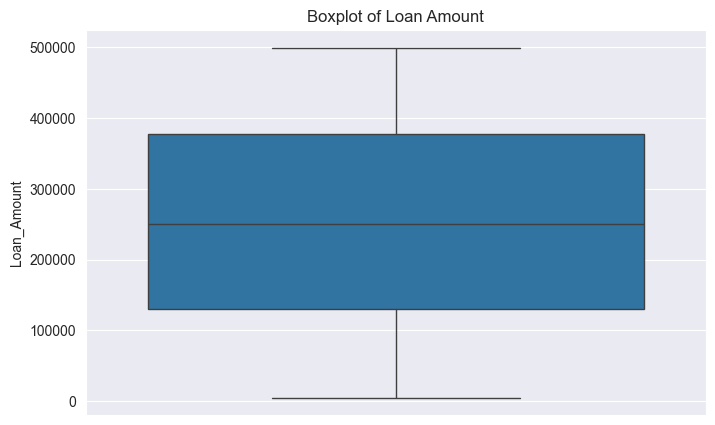

Boxplot helps detect outliers in Loan Amount distribution.


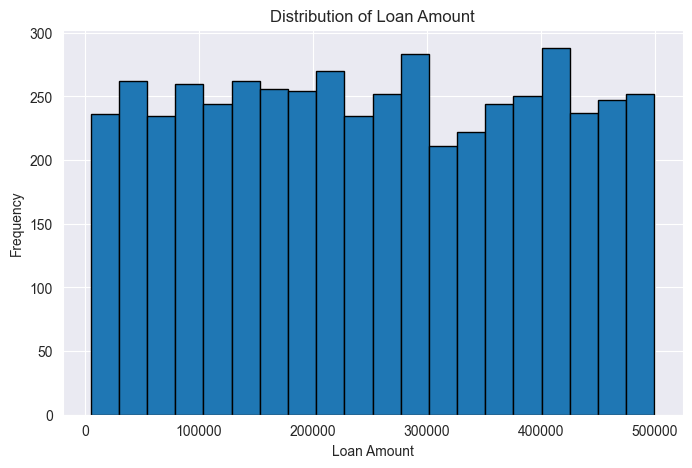

Histogram visualizes the distribution of Loan Amounts among applicants.


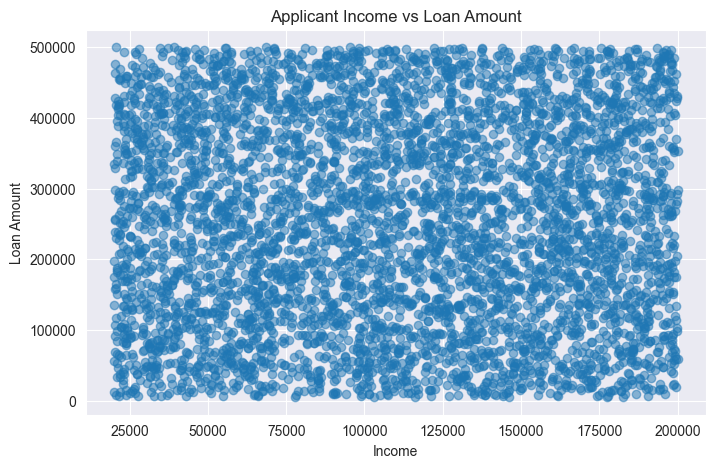

Scatter plot shows the relationship between income and loan amount.
Numerical columns have been standardized for better PCA analysis.


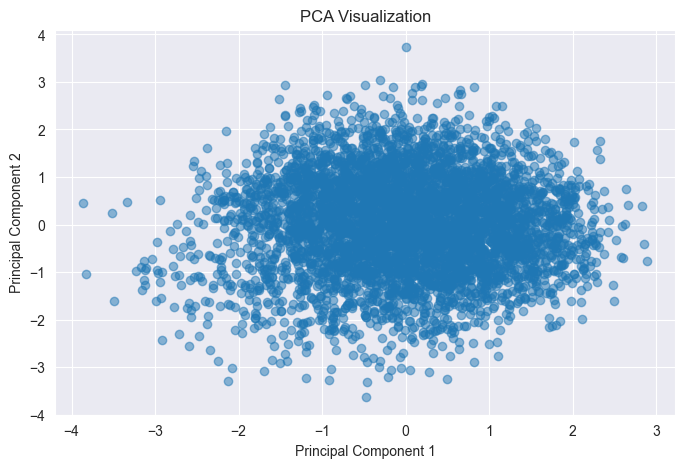

PCA reduces dimensionality while retaining essential variance in data.


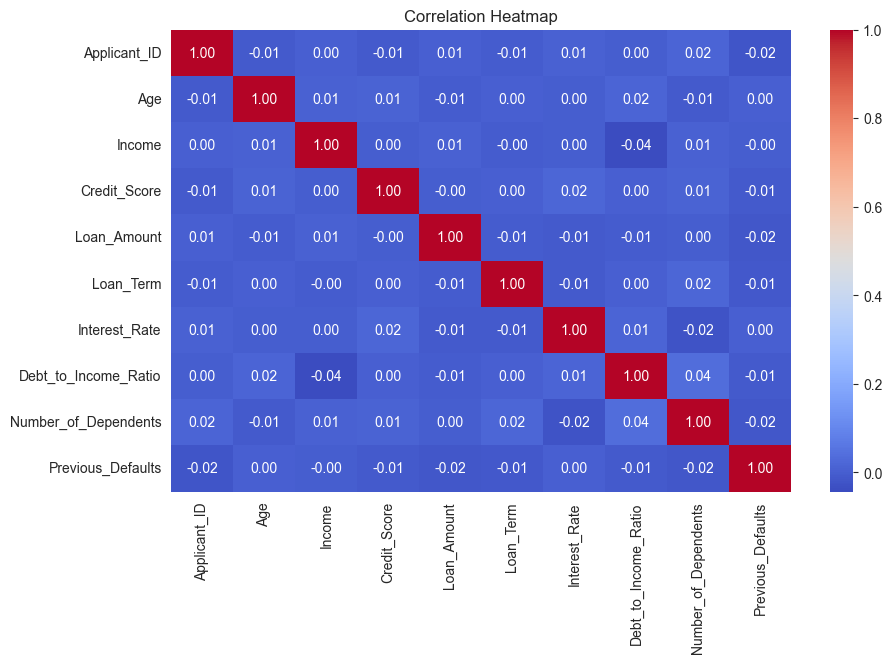

Correlation heatmap shows relationships between numerical features.
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-nul

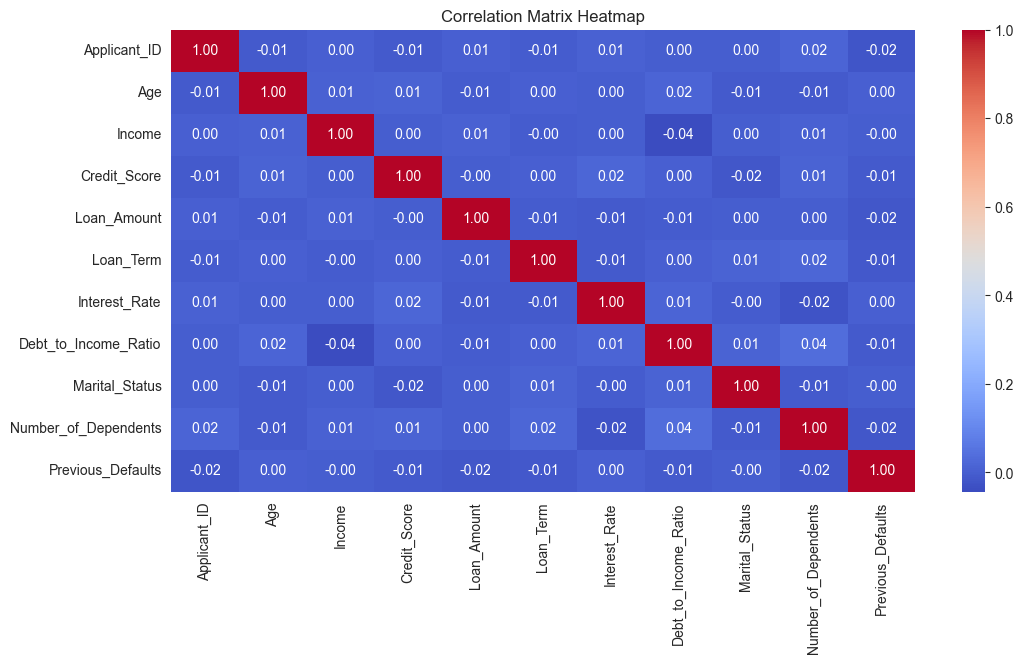


Class Distribution of Income:
Income
143099    3
150193    2
189439    2
177221    2
138920    2
         ..
169594    1
162728    1
166965    1
36493     1
129200    1
Name: count, Length: 4924, dtype: int64


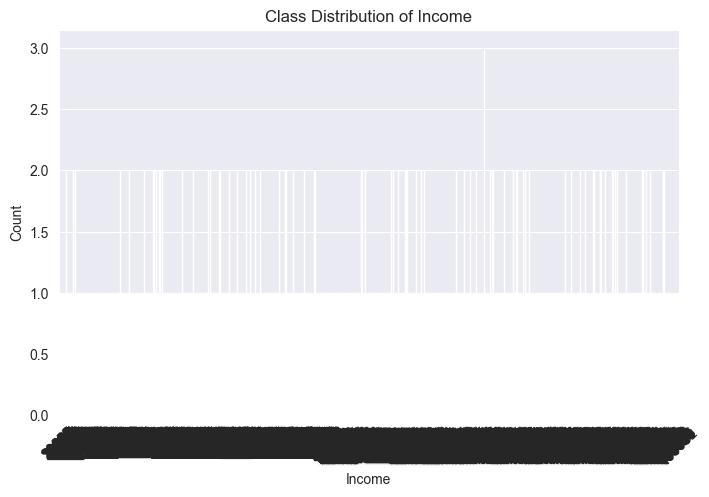


Newly Engineered Features:
  DTI_Category  Loan_to_Income_Ratio Credit_Score_Category  Is_Senior  \
0         High             20.654562                  Fair          0   
1          Low              2.038788                  Good          1   
2         High              2.337487                  Poor          0   
3          Low              3.070047             Excellent          0   
4       Medium              0.591590                  Poor          1   

   Has_Default_History  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

Standardized Numerical Features:
     Income  Loan_Amount  Credit_Score  Debt_to_Income_Ratio  \
0 -1.695793     1.407277      0.404040              1.254939   
1  0.305372     0.035180      0.503777             -1.300293   
2 -0.256351    -0.180138     -0.668134              1.413235   
3 -0.174538     0.409366      1.102200             -1.443069   
4 -1.692471    -1.676760     

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Load the dataset into a pandas DataFrame with escaped backslashes
df = pd.read_csv(r"C:\Users\Ali\Desktop\PythonProject5\PythonProject5\loan_approval_dataset.csv")

# Display the first 5 rows of the dataset
print(df.head())
print(df.shape)


# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Ali\Desktop\PythonProject5\PythonProject5\loan_approval_dataset.csv")

# Display the first 12 rows of the dataset
print("First 12 rows of the dataset:")
print(df.head(12))

# Display the last 12 rows of the dataset
print("\nLast 12 rows of the dataset:")
print(df.tail(12))
# Get the total number of rows and columns
rows, columns = df.shape

# Print the number of rows and columns
print(f'Total number of rows: {rows}')
print(f'Total number of columns: {columns}')
print(df.dtypes)
print(f'The name of the first column is: {df.columns[0]}')
df.info()
print(df.columns)

# Assuming 'Gender' is a categorical attribute, display its distinct values
distinct_values = df['Loan_Amount'].unique()  # Replace 'Gender' with your chosen column name

# Print distinct values
print(f'Distinct values in "Loan_Amount": {distinct_values}')
most_frequent_value = df['Loan_Amount'].mode()[0]

# Print the most frequently occurring value in the 'Gender' column
print(f'The most frequently occurring value in "Loan_Amount" is: {most_frequent_value}')
# Select a numerical column
numerical_column = "Loan_Amount"  # Change this to any numerical column in your dataset

# Calculate quartiles
q1 = df[numerical_column].quantile(0.25)  # 25th percentile
q2 = df[numerical_column].quantile(0.50)  # 50th percentile (median)
q3 = df[numerical_column].quantile(0.75)  # 75th percentile

# Print results
print(f"Quartiles for {numerical_column}:")
print(f"Q1 (25th Percentile): {q1}")
print(f"Q2 (50th Percentile / Median): {q2}")
print(f"Q3 (75th Percentile): {q3}")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
# part 1
# Load the dataset
df = pd.read_csv(r"C:\Users\Ali\Desktop\PythonProject5\PythonProject5\loan_approval_dataset.csv")

# a) Filter rows where 'Loan_Amount' is greater than 200
filtered_df = df[df["Loan_Amount"] > 200]
print("Filtered Data:\n", filtered_df)
print(f"Total records where Loan_Amount > 200: {filtered_df.shape[0]}")

# b) Count applicants where 'Marital_Status' starts with 'D'
count_A = df[df["Marital_Status"].str.startswith("D", na=False)].shape[0]
print(f"Number of applicants with 'Marital_Status' starting with 'D': {count_A}")

# c) Count and remove duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
df = df.drop_duplicates()

# d) Convert 'Loan_Amount' column from integer to string
df["Loan_Amount"] = df["Loan_Amount"].astype(str)

# e) Group by 'Age' and 'Income' and analyze
grouped_data = df.groupby(["Age", "Income"]).size()
print("Grouped Data:\n", grouped_data)
print("This shows how loan approvals are distributed across different age groups and income levels.")

# f) Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# g) Handle missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].median())

print("Missing values handled: Categorical columns filled with mode, numerical columns with median.")

# h) Create Loan Amount bins
df["Loan_Amount"] = pd.to_numeric(df["Loan_Amount"], errors="coerce")
df["LoanAmount_Bins"] = pd.cut(df["Loan_Amount"], bins=5)
print("Loan Amount Bins Count:\n", df["LoanAmount_Bins"].value_counts())
print("Loan amounts are categorized into bins for better segmentation and analysis.")

# i) Identify the row with the max 'Loan_Amount'
max_row = df.loc[df["Loan_Amount"].idxmax()]
print("Row with maximum Loan Amount:\n", max_row)
print("This identifies the applicant with the highest loan amount.")

# j) Boxplot for 'LoanAmount'
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Loan_Amount"])
plt.title("Boxplot of Loan Amount")
plt.show()
print("Boxplot helps detect outliers in Loan Amount distribution.")

# k) Histogram for 'LoanAmount'
plt.figure(figsize=(8, 5))
plt.hist(df["Loan_Amount"], bins=20, edgecolor="black")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amount")
plt.show()
print("Histogram visualizes the distribution of Loan Amounts among applicants.")

# l) Scatter plot of 'Income' vs 'Loan_Amount'
plt.figure(figsize=(8, 5))
plt.scatter(df["Income"], df["Loan_Amount"], alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Applicant Income vs Loan Amount")
plt.show()
print("Scatter plot shows the relationship between income and loan amount.")

# m) Normalize numerical attributes
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical columns have been standardized for better PCA analysis.")

# n) Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_cols])
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Visualize PCA results
plt.figure(figsize=(8, 5))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()
print("PCA reduces dimensionality while retaining essential variance in data.")

# o) Correlation heatmap of numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("Correlation heatmap shows relationships between numerical features.")
import pandas as pd

# part 2

# Load the dataset

df = pd.read_csv(r"C:\Users\Ali\Desktop\PythonProject5\PythonProject5\loan_approval_dataset.csv")

# Display dataset info
print("Dataset Information:")
print(df.info())

# Print column names to verify
print("\nAvailable Columns:", df.columns.tolist())

# ---------------------------------
# 🟢 STEP 1: Handle Categorical Data (Avoid Missing Column Errors)
# ---------------------------------
# Convert binary categorical features using Label Encoding
binary_columns = ["Marital_Status", "Previous_Defaults"]  # Adjusted to match dataset

# Encode only existing columns
le = LabelEncoder()
for col in binary_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"⚠ Warning: Column '{col}' not found in dataset!")

# Convert multi-category columns using One-Hot Encoding (if they exist)
categorical_columns = ["Employment_Status", "Property_Ownership", "Loan_Purpose"]
for col in categorical_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
    else:
        print(f"⚠ Warning: Column '{col}' not found in dataset!")

# ---------------------------------
# 🔵 STEP 2: Compute Correlation Matrix
# ---------------------------------
# Select only numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=["number"])
correlation_matrix = df_numeric.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# ---------------------------------
# 🟠 STEP 3: Find Class Distribution of Loan Purpose (if exists)
# ---------------------------------
if "Income" in df.columns:
    categorical_column = "Income"
    class_distribution = df[categorical_column].value_counts()

    # Print class distribution
    print(f"\nClass Distribution of {categorical_column}:")
    print(class_distribution)

    # Visualize the distribution
    plt.figure(figsize=(8, 5))
    sns.barplot(x=class_distribution.index, y=class_distribution.values, hue=class_distribution.index,
                palette="viridis", legend=False)

    plt.title(f"Class Distribution of {categorical_column}")
    plt.xlabel(categorical_column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠ Warning: 'Income' column not found in dataset!")

# ---------------------------------
# 🟡 STEP 4: Feature Engineering (Creating New Features)
# ---------------------------------
from sklearn.preprocessing import StandardScaler

# 🔹 Feature 1: Debt-to-Income (DTI) Category
# Converts numerical debt-to-income ratio into categorical groups (Low, Medium, High)
if "Debt_to_Income_Ratio" in df.columns:
    def categorize_dti(dti):
        if dti < 20:
            return "Low"
        elif 20 <= dti < 40:
            return "Medium"
        else:
            return "High"

    df["DTI_Category"] = df["Debt_to_Income_Ratio"].apply(categorize_dti)

# 🔹 Feature 2: Loan-to-Income Ratio
# Measures the proportion of an applicant's income being used for the loan
if "Loan_Amount" in df.columns and "Income" in df.columns:
    df["Loan_to_Income_Ratio"] = df["Loan_Amount"] / df["Income"]

# 🔹 Feature 3: Credit Score Category
# Groups credit scores into categories (Excellent, Good, Fair, Poor) for better analysis
if "Credit_Score" in df.columns:
    def credit_category(score):
        if score >= 750:
            return "Excellent"
        elif 650 <= score < 750:
            return "Good"
        elif 550 <= score < 650:
            return "Fair"
        else:
            return "Poor"

    df["Credit_Score_Category"] = df["Credit_Score"].apply(credit_category)

# 🔹 Feature 4: Is Senior Applicant? (Age ≥ 60)
# Creates a binary flag (1 = Senior, 0 = Not Senior) to capture age-related loan policies
if "Age" in df.columns:
    df["Is_Senior"] = (df["Age"] >= 60).astype(int)

# 🔹 Feature 5: Employment Stability
# Combines employment status columns to indicate stability (1 = Stable, 0 = Unstable)
if "Employment_Status_Full-Time" in df.columns and "Employment_Status_Self-Employed" in df.columns:
    df["Is_Employed"] = df["Employment_Status_Full-Time"] + df["Employment_Status_Self-Employed"]

# 🔹 Feature 6: Previous Defaults Indicator
# Flags applicants with a history of previous defaults (1 = Has Defaults, 0 = No Defaults)
if "Previous_Defaults" in df.columns:
    df["Has_Default_History"] = (df["Previous_Defaults"] > 0).astype(int)

# Display new features (if created)
engineered_features = ["DTI_Category", "Loan_to_Income_Ratio", "Credit_Score_Category", "Is_Senior", "Is_Employed", "Has_Default_History"]
existing_features = [col for col in engineered_features if col in df.columns]

if existing_features:
    print("\nNewly Engineered Features:")
    print(df[existing_features].head())
else:
    print("⚠ No engineered features found!")

# ---------------------------------
# 🟣 STEP 5: Normalize Numerical Features (Only If They Exist)
# ---------------------------------
# Standardizes numerical features to have mean 0 and standard deviation 1 (important for ML models)
scaler = StandardScaler()
numerical_features = ["Income", "Loan_Amount", "Credit_Score", "Debt_to_Income_Ratio", "Loan_to_Income_Ratio"]
existing_numerical_features = [col for col in numerical_features if col in df.columns]

if existing_numerical_features:
    df[existing_numerical_features] = scaler.fit_transform(df[existing_numerical_features])
    print("\nStandardized Numerical Features:")
    print(df[existing_numerical_features].head())
else:
    print("⚠ No numerical features found for normalization!")
    # part 3